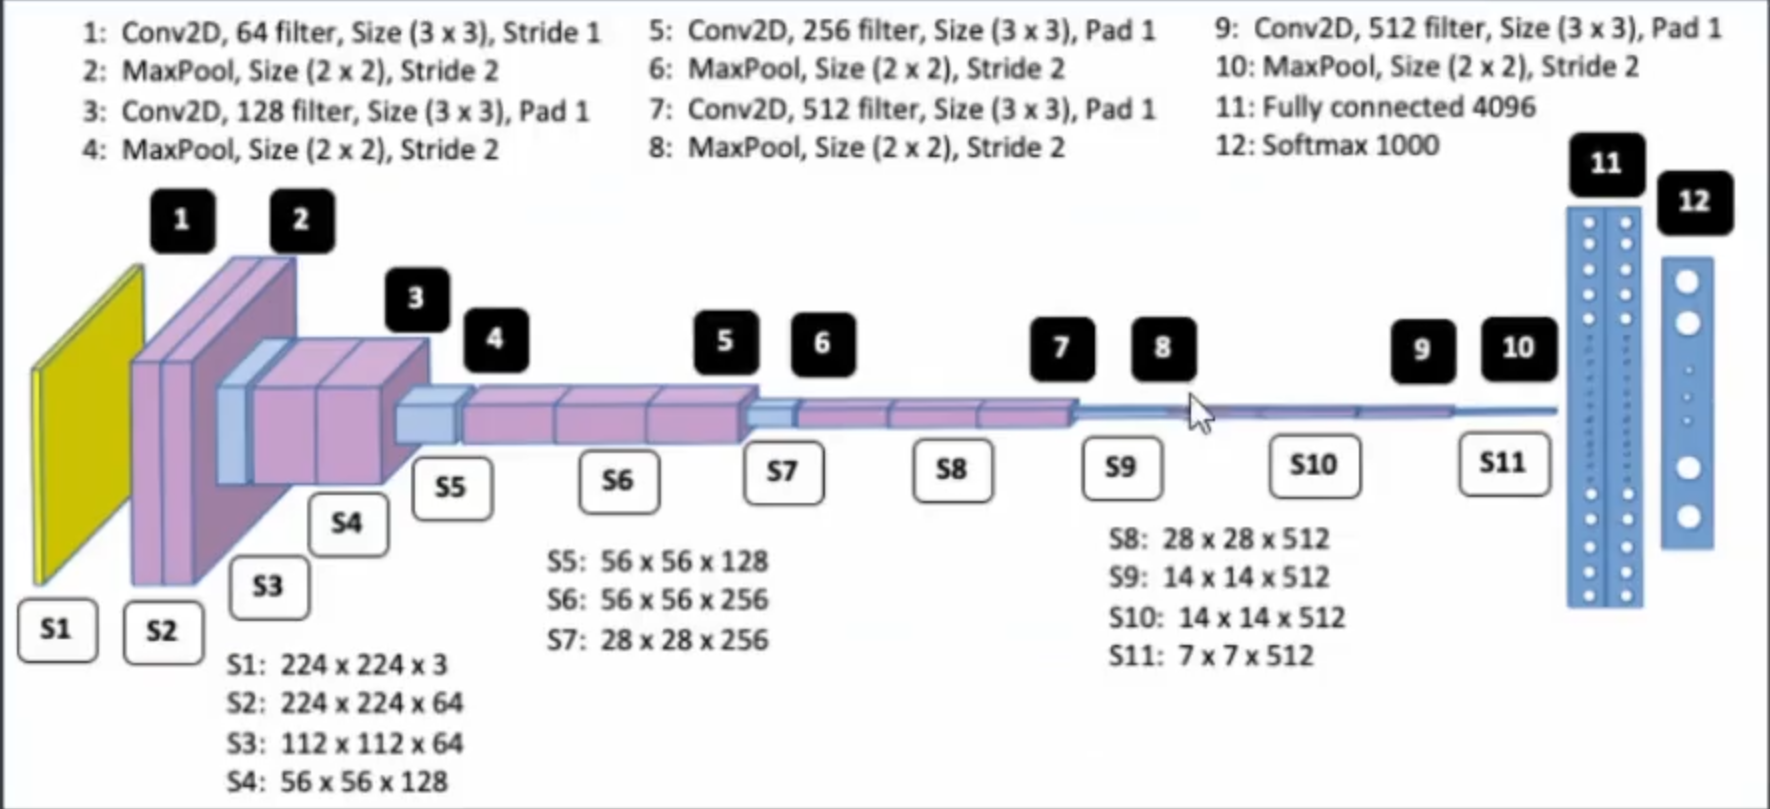

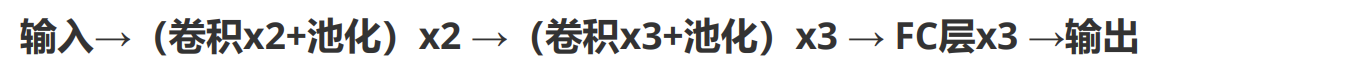

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torchinfo import summary

In [5]:
class VGG16Model(nn.Module):
    def __init__(self):
        super().__init__()

        #block1 conv*2+pool
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=64,
                               kernel_size=3,
                               padding=1)
        self.conv2 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=3,
                               padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        #block2 conv*2+pool
        self.conv3 = nn.Conv2d(in_channels=64,
                               out_channels=128,
                               kernel_size=3,
                               padding=1)
        self.conv4 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=3,
                               padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        #block3 conv*3+pool
        self.conv5 = nn.Conv2d(in_channels=128,
                               out_channels=256,
                               kernel_size=3,
                               padding=1)
        self.conv6 = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=3,
                               padding=1)
        self.conv7 = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=3,
                               padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2)


        #block4 conv*3+pool
        self.conv8 = nn.Conv2d(in_channels=256,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.conv9 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.conv10 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        #block5 conv*3+pool
        self.conv11 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.conv12 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.conv13 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2)

        #FC层
        self.linear1 = nn.Linear(512*7*7,4096)
        self.linear2 = nn.Linear(4096,4096)
        self.linear3 = nn.Linear(4096,1000)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool1(F.relu(self.conv2(x)))

        x = F.relu(self.conv3(x))
        x = self.pool2(F.relu(self.conv4(x)))

        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.pool3(F.relu(self.conv7(x)))

        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = self.pool4(F.relu(self.conv10(x)))

        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = self.pool5(F.relu(self.conv13(x)))
        #Flatten 操作
        x = x.view(-1,512*7*7)

        x = F.relu(self.linear1(F.dropout(x,p=0.5)))
        x = F.relu(self.linear2(F.dropout(x,p=0.5)))
        output = F.softmax(self.linear3(x),dim=1)

        return output





In [6]:
vgg = VGG16Model()

In [8]:
summary(vgg,input_size=(10,3,224,224),device="cuda")

Layer (type:depth-idx)                   Output Shape              Param #
VGG16Model                               [10, 1000]                --
├─Conv2d: 1-1                            [10, 64, 224, 224]        1,792
├─Conv2d: 1-2                            [10, 64, 224, 224]        36,928
├─MaxPool2d: 1-3                         [10, 64, 112, 112]        --
├─Conv2d: 1-4                            [10, 128, 112, 112]       73,856
├─Conv2d: 1-5                            [10, 128, 112, 112]       147,584
├─MaxPool2d: 1-6                         [10, 128, 56, 56]         --
├─Conv2d: 1-7                            [10, 256, 56, 56]         295,168
├─Conv2d: 1-8                            [10, 256, 56, 56]         590,080
├─Conv2d: 1-9                            [10, 256, 56, 56]         590,080
├─MaxPool2d: 1-10                        [10, 256, 28, 28]         --
├─Conv2d: 1-11                           [10, 512, 28, 28]         1,180,160
├─Conv2d: 1-12                           [10, 5